In [231]:
print("Hello world, test")

Hello world, test


# The goal here is to have a cleaned data so we can know the performance of the employees

#1- Load Data

In [232]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Load data
dataset = pd.read_csv("/home/garments_worker_productivity.csv")
print("Dataset shape", dataset.shape)
dataset.describe()

Dataset shape (1197, 15)


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

From this description we can see:
- wip has some null values out of 1197 entries (42%)
- there is a lot of 0 in over_time, incentive, idle_time, idle_men
- the maximum value in idle_men and no_of_style_change are really high

In [234]:
numerical_vars = ['targeted_productivity', 'smv', 'actual_productivity', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
categorical_vars = ['quarter', 'department', 'day']

#2- Handle missing data

In [235]:
#Identify missing data
missing_values = dataset.isnull().sum()
print("\nMissing Values (Original Data):\n", missing_values)


Missing Values (Original Data):
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


The missing value in wip is more than 42%<br/>
For me deletion is the better option

In [236]:
# Delete missing values in the 'wip' column using the mean
dataset.drop(columns=['wip'], inplace=True)

# Check if missing values have been handled
missing_values_after = dataset.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)


Missing Values After Imputation:
 date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


#3- Handle duplicates data

In [237]:
print("\nData shape before removing duplicates:\n", dataset.shape)
# Remove duplicates
no_duplicate_data = dataset.drop_duplicates()
print("\nData shape after removing duplicates:\n", no_duplicate_data.shape)
print(no_duplicate_data.describe())


Data shape before removing duplicates:
 (1197, 14)

Data shape after removing duplicates:
 (1197, 14)
              team  targeted_productivity          smv     over_time  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   4567.460317   
std       3.463963               0.097891    10.943219   3348.823563   
min       1.000000               0.070000     2.900000      0.000000   
25%       3.000000               0.700000     3.940000   1440.000000   
50%       6.000000               0.750000    15.260000   3960.000000   
75%       9.000000               0.800000    24.260000   6960.000000   
max      12.000000               0.800000    54.560000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987

There is no duplicate value <br>

#4- Scaling

In [238]:
# # Columns to be scaled
# columns_to_scale = [
#     'team', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
#     'no_of_style_change', 'no_of_workers'
# ]

In [239]:
# # Assuming 'dataset' is your original DataFrame
# no_duplicates_decimal = dataset.copy()

# # Compute the scale factor j for each column
# scale_factors = np.ceil(np.log10(np.abs(dataset[numerical_vars]).max())).astype(int)

# # Apply Decimal Scaling
# no_duplicates_decimal[numerical_vars] = dataset[numerical_vars] / (10 ** scale_factors)

# # Display descriptive statistics after scaling
# print("\nDescriptive Statistics after Decimal Scaling:")
# print(no_duplicates_decimal.describe())


In [240]:
# no_duplicates_minmax = dataset.copy()

# # Apply Min-Max Normalization
# for col in numerical_vars:
#     X_min = dataset[col].min()
#     X_max = dataset[col].max()
#     no_duplicates_minmax[col] = (dataset[col] - X_min) / (X_max - X_min)

# # Display descriptive statistics after normalization
# print("\nDescriptive Statistics after Min-Max Normalization:")
# print(no_duplicates_minmax.describe())


In [241]:
no_duplicates_zscore = no_duplicate_data.copy()

# Apply Z-Score normalization to the selected columns
no_duplicates_zscore[numerical_vars] = no_duplicates_zscore[numerical_vars].apply(zscore)

# Display the descriptive statistics after Z-Score normalization
print("\nDescriptive Statistics after Z-Score Normalization:")
print(no_duplicates_zscore.describe())



Descriptive Statistics after Z-Score Normalization:
              team  targeted_productivity           smv     over_time  \
count  1197.000000           1.197000e+03  1.197000e+03  1.197000e+03   
mean      6.426901          -3.531938e-16  9.942849e-17  1.187206e-16   
std       3.463963           1.000418e+00  1.000418e+00  1.000418e+00   
min       1.000000          -6.741257e+00 -1.111853e+00 -1.364470e+00   
25%       3.000000          -3.028349e-01 -1.016778e+00 -9.342886e-01   
50%       6.000000           2.081510e-01  1.808523e-02 -1.814710e-01   
75%       9.000000           7.191368e-01  8.408561e-01  7.147405e-01   
max      12.000000           7.191368e-01  3.610851e+00  6.378797e+00   

         incentive     idle_time      idle_men  no_of_style_change  \
count  1197.000000  1.197000e+03  1.197000e+03        1.197000e+03   
mean      0.000000  5.936030e-18  2.374412e-17       -4.748824e-17   
std       1.000418  1.000418e+00  1.000418e+00        1.000418e+00   
min      

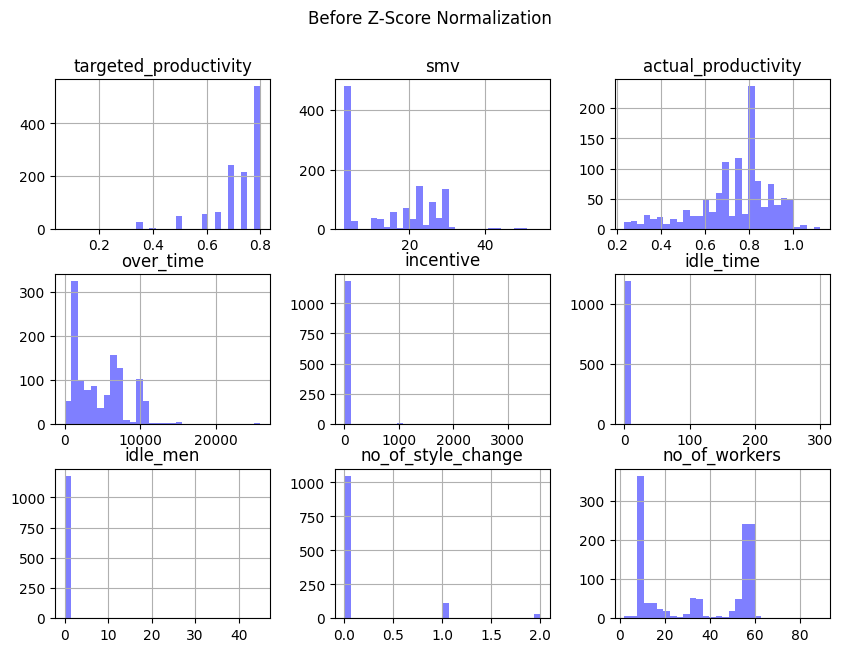

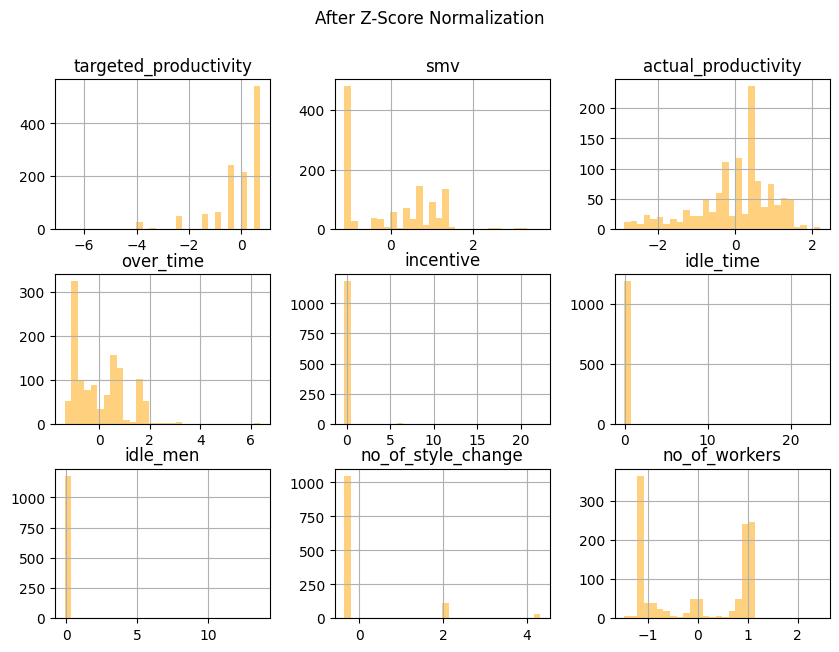

In [242]:
no_duplicate_data[numerical_vars].hist(bins=30, figsize=(10, 7), color='blue', alpha=0.5)
plt.suptitle("Before Z-Score Normalization")
plt.show()

no_duplicates_zscore[numerical_vars].hist(bins=30, figsize=(10, 7), color='orange', alpha=0.5)
plt.suptitle("After Z-Score Normalization")
plt.show()

#5- EDA

In [243]:
data = no_duplicates_zscore.copy()

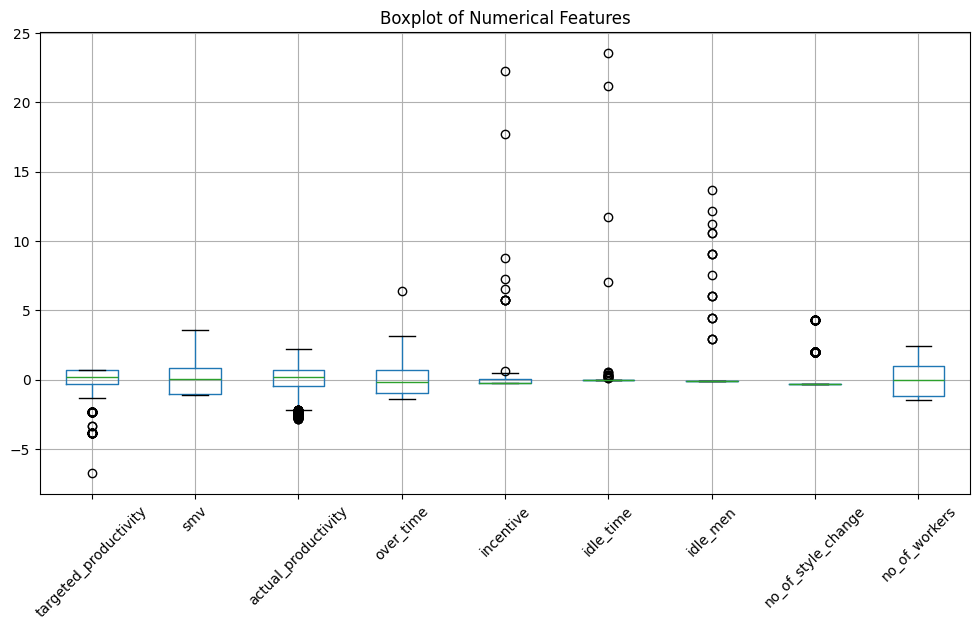


Outliers Count per Variable:
targeted_productivity     79
smv                        0
actual_productivity       54
over_time                  1
incentive                 11
idle_time                 18
idle_men                  18
no_of_style_change       147
no_of_workers              0
dtype: int64


In [244]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
data[numerical_vars].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

# Interquartile Range (IQR) method for outlier detection
Q1 = data[numerical_vars].quantile(0.25)
Q3 = data[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numerical_vars] < (Q1 - 1.5 * IQR)) | (data[numerical_vars] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers Count per Variable:")
print(outliers)


Handling outlier

In [245]:
from scipy.stats.mstats import winsorize

for col in numerical_vars:
    data[col] = winsorize(data[col], limits=[0.05, 0.05])  # Cap extreme 5% values

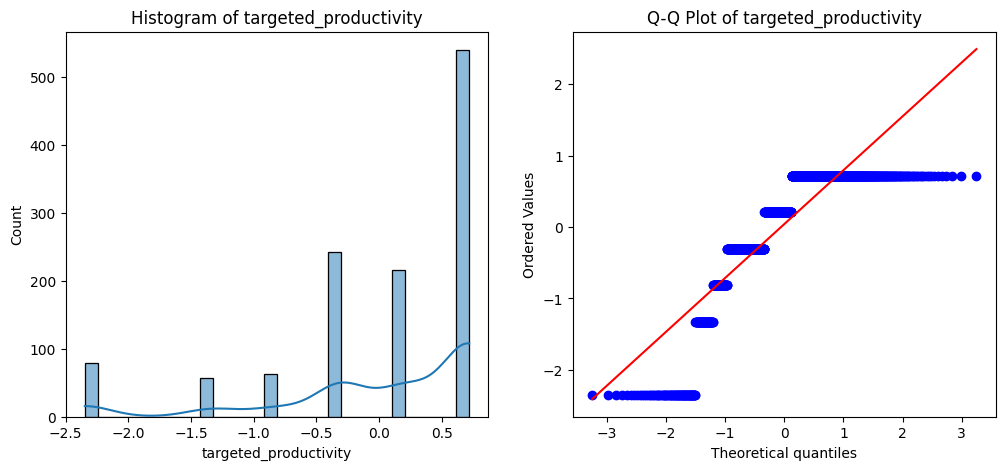

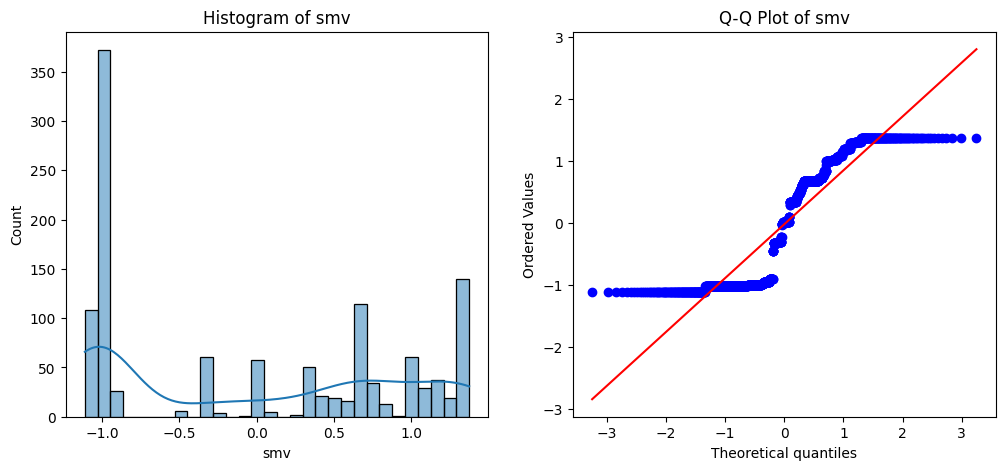

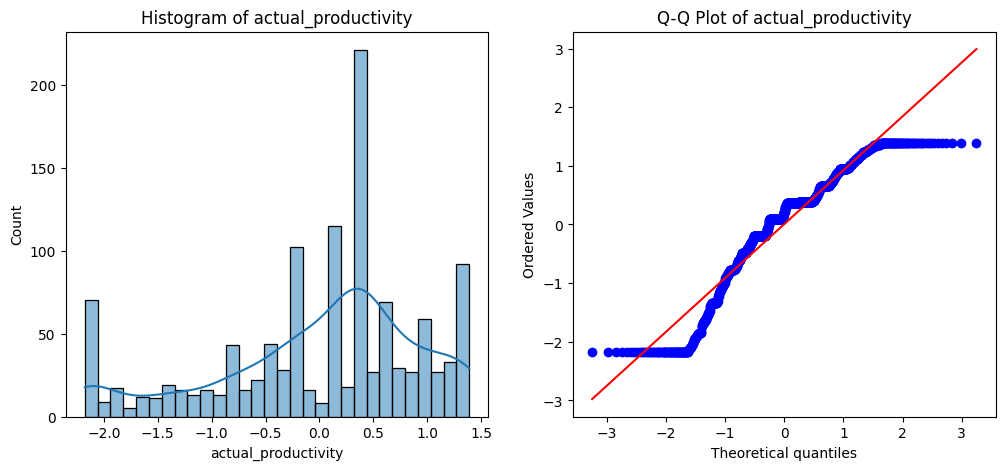

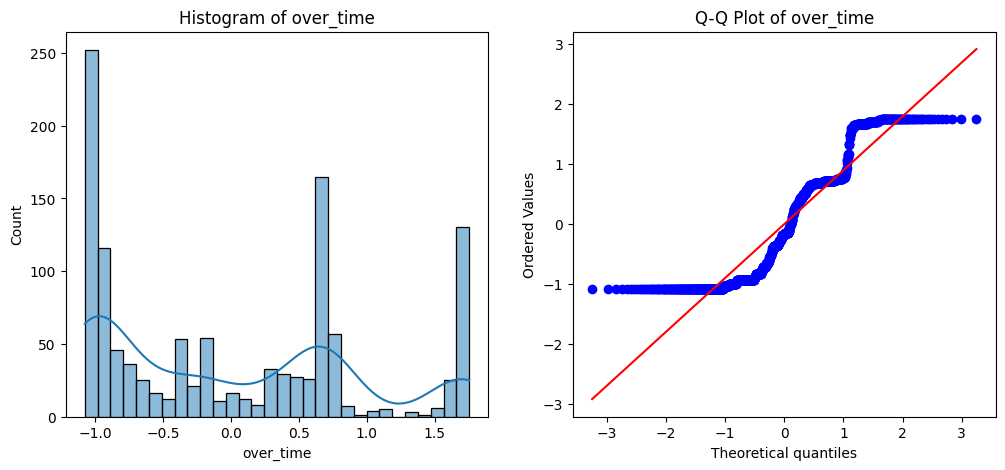

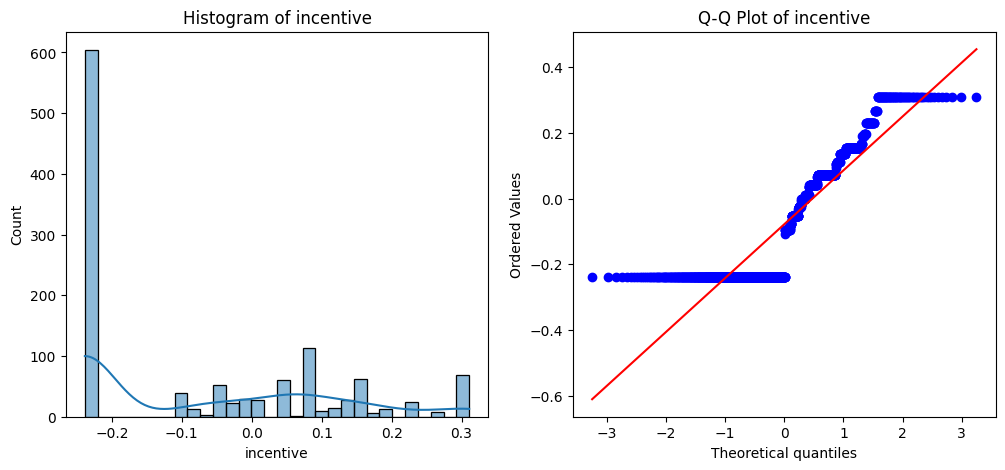

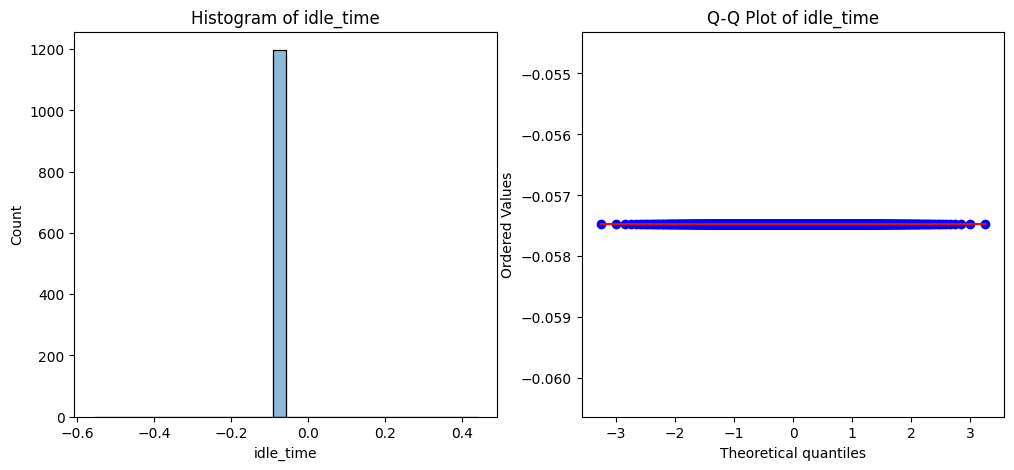

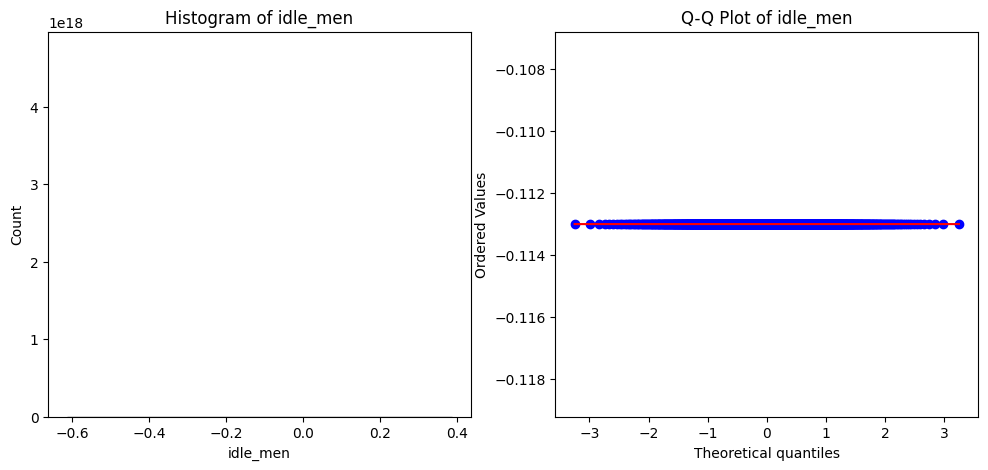

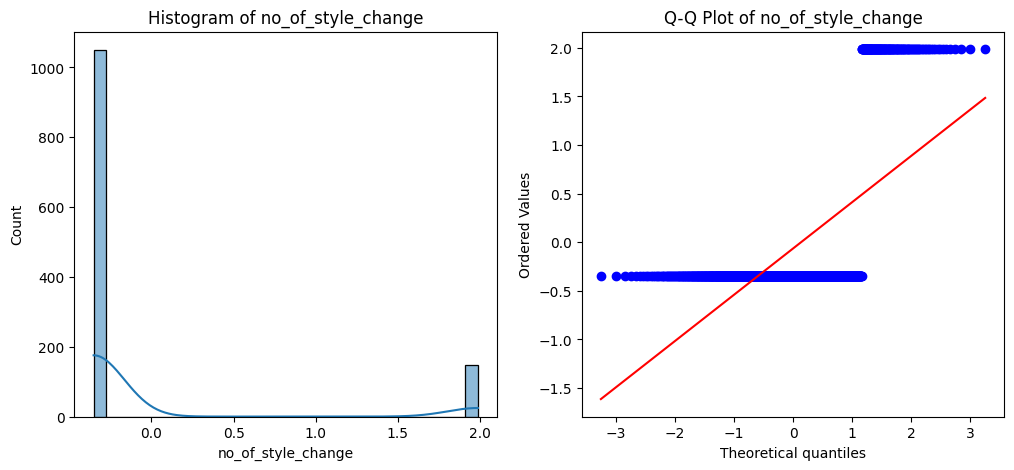

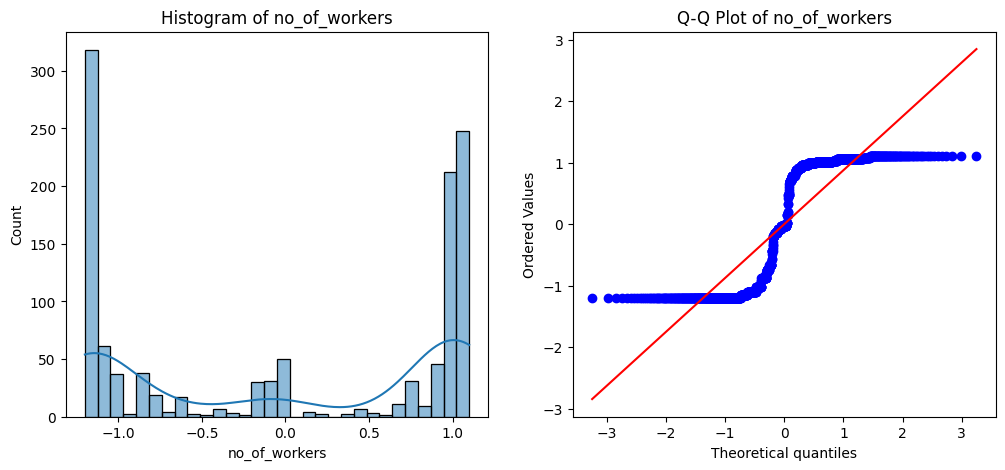

In [246]:
for col in numerical_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.show()


In [247]:
for col in numerical_vars:
    stat, p = stats.shapiro(data[col])
    print(f"\nShapiro-Wilk Test for {col}: Statistics={stat}, p={p}")
    if p < 0.5:
        print(f"{col} is NOT normally distributed")
    else:
        print(f"{col} is normally distributed")



Shapiro-Wilk Test for targeted_productivity: Statistics=0.7638936269592304, p=2.5910233487166294e-38
targeted_productivity is NOT normally distributed

Shapiro-Wilk Test for smv: Statistics=0.8344924379486796, p=1.7141186560979737e-33
smv is NOT normally distributed

Shapiro-Wilk Test for actual_productivity: Statistics=0.9306920035259001, p=4.111858845866588e-23
actual_productivity is NOT normally distributed

Shapiro-Wilk Test for over_time: Statistics=0.880252402225767, p=2.1403265354198448e-29
over_time is NOT normally distributed

Shapiro-Wilk Test for incentive: Statistics=0.8032343826323399, p=8.491902187349763e-36
incentive is NOT normally distributed

Shapiro-Wilk Test for idle_time: Statistics=1.0, p=1.0
idle_time is normally distributed

Shapiro-Wilk Test for idle_men: Statistics=1.0, p=1.0
idle_men is normally distributed

Shapiro-Wilk Test for no_of_style_change: Statistics=0.3836374305602507, p=4.98917111737374e-53
no_of_style_change is NOT normally distributed

Shapiro-

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
